In [5]:
import geopandas as gpd
import pandas as pd

In [4]:
df_viajes = pd.read_csv('../data/csv/ViajesEODH_2019.csv')
gdf_zat = gpd.read_file('../data/shp/ZAT.shp', encoding='utf-8')

#### Viajes por modo de transporte

<AxesSubplot:xlabel='modo_principal'>

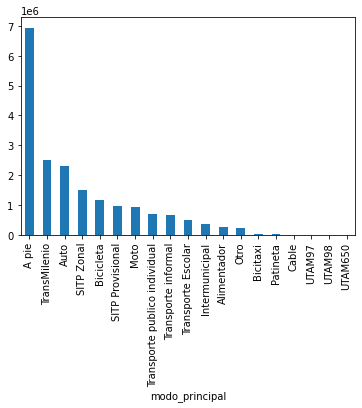

In [18]:
df_viajes.groupby('modo_principal')['f_exp'].sum().sort_values(ascending=False).plot(kind='bar')